In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

18.294542360728315 -175.60646382748425
-40.76974214087084 -99.0692416858667
-64.98747259379357 -35.466096493239576
-46.212869634994824 -12.193695593137164
-85.28514913206769 163.77225691745474
-65.54524585343108 -22.95133755420494
-28.58854146596824 142.35611320650838
14.31790826339622 -141.6792033107967
-41.62160716268669 -102.97008987574341
84.00650480602945 -9.800210295119967
61.115152460633425 -119.2879139927822
-61.8413070849634 89.82119857040198
-37.4633245302949 -149.79662746211235
61.4623921423798 -89.35438220749593
-48.10917039221462 -171.9273426261782
-27.111090115874816 -48.76968064723232
7.055796845397907 64.63887615882769
-72.63851899482664 39.82250436694403
53.27448565982809 -10.850964192910368
-21.968734199629267 -175.69770030121424
-0.7091126875987186 -102.02258203404755
53.2867838158777 -106.33893757666294
8.987037558994103 -141.56345932041157
70.26803059270884 -12.391577065468823
49.73862384780156 -152.59893282966993
-36.43853781423741 17.41809373551996
-56.5093258582

In [5]:
#Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

622

In [7]:
#Import the requests library
import requests

#Import the API key
from config import weather_api_key

In [8]:
#Starting URL for Weather Map API call.

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []

In [11]:
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kapaa
Processing Record 2 of Set 1 | ancud
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | chuy
Processing Record 7 of Set 1 | broken hill
Processing Record 8 of Set 1 | hilo
Processing Record 9 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 10 of Set 1 | high level
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | thompson
Processing Record 14 of Set 1 | vaini
Processing Record 15 of Set 1 | itapema
Processing Record 16 of Set 1 | kulhudhuffushi
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | dingle
Processing Record 19 of Set 1 | puerto ayora
Processing Record 20 of Set 1 | shellbrook
Processing Record 21 of Set 1 | husavik
Processing Record 22 of Set 1 | kodiak
Processing Record

Processing Record 40 of Set 4 | innisfail
Processing Record 41 of Set 4 | namatanai
Processing Record 42 of Set 4 | ilulissat
Processing Record 43 of Set 4 | palabuhanratu
City not found. Skipping...
Processing Record 44 of Set 4 | bafra
Processing Record 45 of Set 4 | luderitz
Processing Record 46 of Set 4 | kizukuri
Processing Record 47 of Set 4 | kavaratti
Processing Record 48 of Set 4 | iqaluit
Processing Record 49 of Set 4 | tiarei
Processing Record 50 of Set 4 | kandrian
Processing Record 1 of Set 5 | virginia beach
Processing Record 2 of Set 5 | bilma
Processing Record 3 of Set 5 | turayf
Processing Record 4 of Set 5 | saint-philippe
Processing Record 5 of Set 5 | nanortalik
Processing Record 6 of Set 5 | kapuskasing
Processing Record 7 of Set 5 | guerrero negro
Processing Record 8 of Set 5 | nelson bay
Processing Record 9 of Set 5 | bambous virieux
Processing Record 10 of Set 5 | kavieng
Processing Record 11 of Set 5 | salalah
Processing Record 12 of Set 5 | bayeux
Processing R

Processing Record 29 of Set 8 | vostok
Processing Record 30 of Set 8 | novoagansk
Processing Record 31 of Set 8 | klaksvik
Processing Record 32 of Set 8 | chatakonda
Processing Record 33 of Set 8 | kenai
Processing Record 34 of Set 8 | saint-joseph
Processing Record 35 of Set 8 | haikou
Processing Record 36 of Set 8 | cayhagan
Processing Record 37 of Set 8 | warmbad
Processing Record 38 of Set 8 | saint-francois
Processing Record 39 of Set 8 | linhares
Processing Record 40 of Set 8 | inta
Processing Record 41 of Set 8 | timra
Processing Record 42 of Set 8 | manta
Processing Record 43 of Set 8 | stornoway
Processing Record 44 of Set 8 | fort-shevchenko
Processing Record 45 of Set 8 | tshikapa
Processing Record 46 of Set 8 | juifang
City not found. Skipping...
Processing Record 47 of Set 8 | portland
Processing Record 48 of Set 8 | luau
Processing Record 49 of Set 8 | macas
Processing Record 50 of Set 8 | vicuna
Processing Record 1 of Set 9 | leh
Processing Record 2 of Set 9 | nador
Proc

Processing Record 10 of Set 12 | kuche
City not found. Skipping...
Processing Record 11 of Set 12 | barzas
Processing Record 12 of Set 12 | kurilsk
Processing Record 13 of Set 12 | trinidad
Processing Record 14 of Set 12 | faanui
Processing Record 15 of Set 12 | vaitupu
City not found. Skipping...
Processing Record 16 of Set 12 | jambi
Processing Record 17 of Set 12 | nueva loja
Processing Record 18 of Set 12 | margate
Processing Record 19 of Set 12 | lexington
Processing Record 20 of Set 12 | chapais
Processing Record 21 of Set 12 | narasannapeta
Processing Record 22 of Set 12 | zlotow
Processing Record 23 of Set 12 | petropavlovsk-kamchatskiy
Processing Record 24 of Set 12 | murakeresztur
Processing Record 25 of Set 12 | pandan
Processing Record 26 of Set 12 | nikolayevsk-na-amure
Processing Record 27 of Set 12 | pathardi
Processing Record 28 of Set 12 | sola
Processing Record 29 of Set 12 | port moresby
Processing Record 30 of Set 12 | saint george
Processing Record 31 of Set 12 | f

In [12]:
len(city_data)

565

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,22.0752,-159.3190,70.11,93,100,17.31,US,2022-12-11 17:39:05
1,Ancud,-41.8697,-73.8203,58.71,63,13,11.45,CL,2022-12-11 17:40:04
2,Ushuaia,-54.8000,-68.3000,49.66,62,75,12.66,AR,2022-12-11 17:36:49
3,Jamestown,42.0970,-79.2353,37.02,75,100,13.00,US,2022-12-11 17:36:29
4,Bluff,-46.6000,168.3333,51.06,94,57,3.98,NZ,2022-12-11 17:40:05
5,Chuy,-33.6971,-53.4616,91.29,35,0,9.73,UY,2022-12-11 17:37:30
6,Broken Hill,-31.9500,141.4333,56.93,52,28,22.01,AU,2022-12-11 17:40:06
7,Hilo,19.7297,-155.0900,69.28,95,20,5.75,US,2022-12-11 17:36:47
8,High Level,58.5169,-117.1360,-11.09,77,100,6.91,CA,2022-12-11 17:40:06
9,Busselton,-33.6500,115.3333,54.01,67,0,13.69,AU,2022-12-11 17:36:54


In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

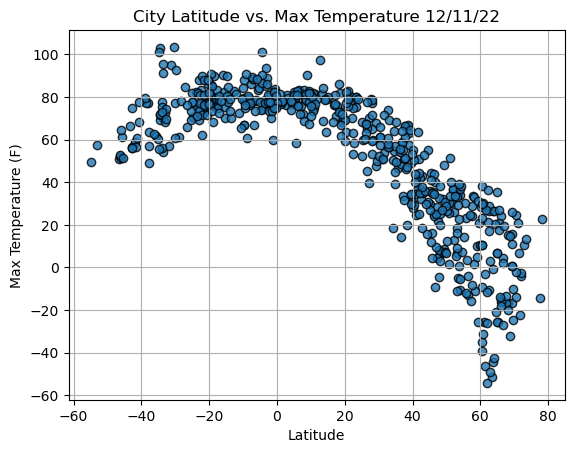

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

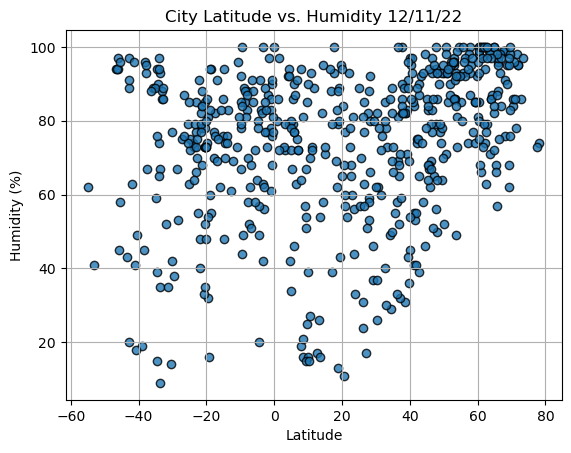

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")

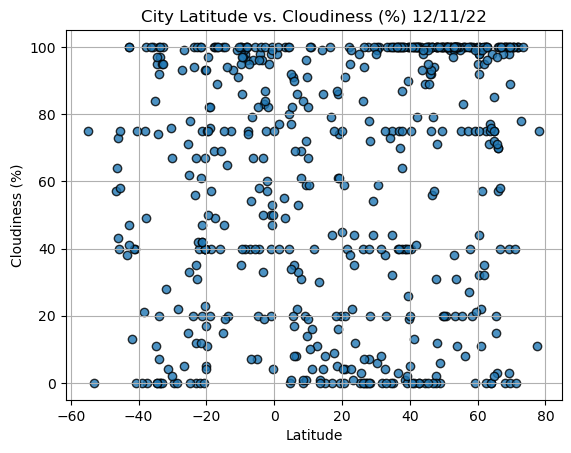

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")

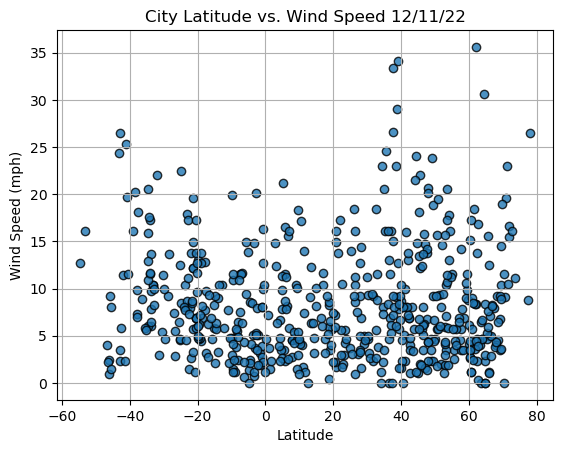

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")

In [19]:
#Import linear regression from the SciPy stats modules.
from scipy.stats import linregress

In [20]:
#Import Matplotlib.
import matplotlib.pyplot as plt

In [21]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)


In [22]:
index13 = city_data_df.loc[13]
index13

City                      Itapema
Lat                      -27.0903
Lng                      -48.6114
Max Temp                    84.85
Humidity                       75
Cloudiness                     93
Wind Speed                   7.45
Country                        BR
Date          2022-12-11 17:40:08
Name: 13, dtype: object

In [23]:
city_data_df["Lat"] >= 0

0       True
1      False
2      False
3       True
4      False
       ...  
560     True
561     True
562     True
563     True
564     True
Name: Lat, Length: 565, dtype: bool

In [24]:
city_data_df.loc[(city_data_df["Lat"] >=0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,22.0752,-159.3190,70.11,93,100,17.31,US,2022-12-11 17:39:05
3,Jamestown,42.0970,-79.2353,37.02,75,100,13.00,US,2022-12-11 17:36:29
7,Hilo,19.7297,-155.0900,69.28,95,20,5.75,US,2022-12-11 17:36:47
8,High Level,58.5169,-117.1360,-11.09,77,100,6.91,CA,2022-12-11 17:40:06
11,Thompson,55.7435,-97.8558,23.16,93,100,3.44,CA,2022-12-11 17:40:08


In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

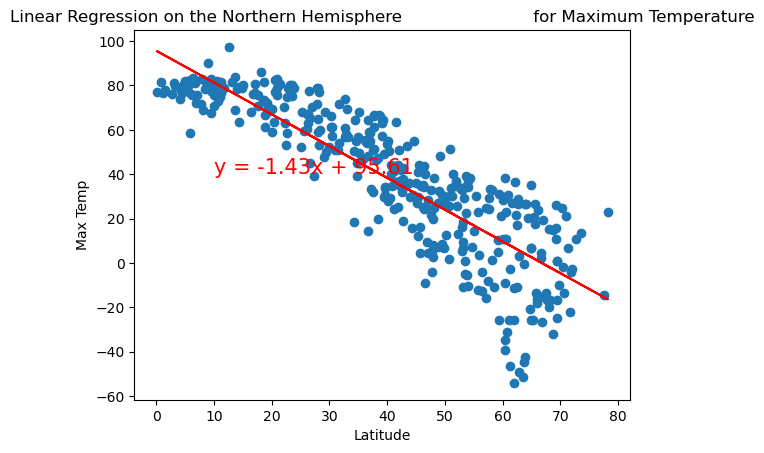

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

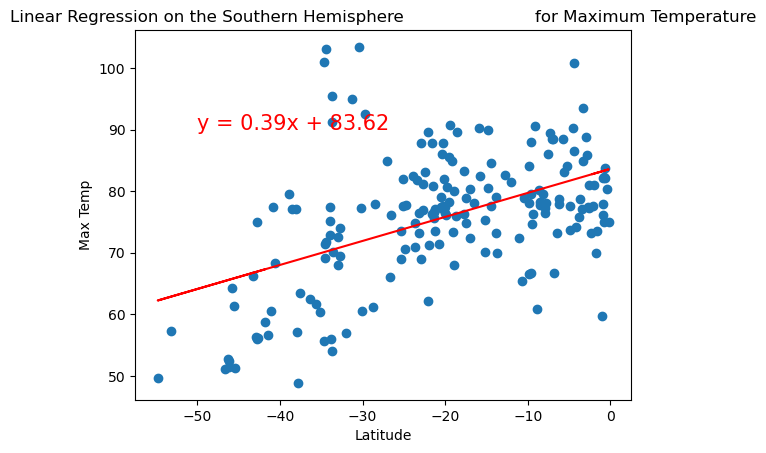

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

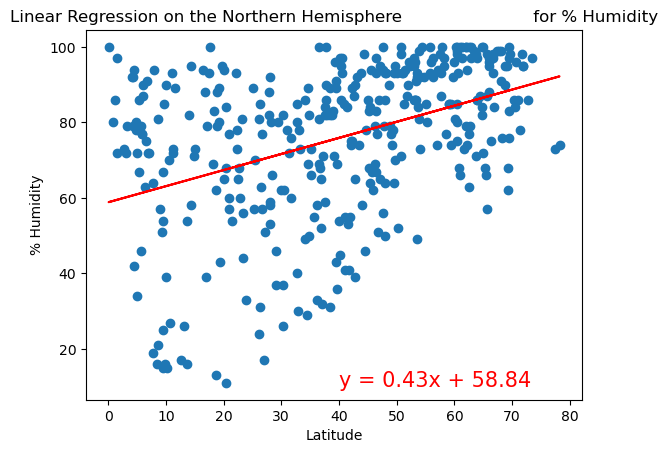

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

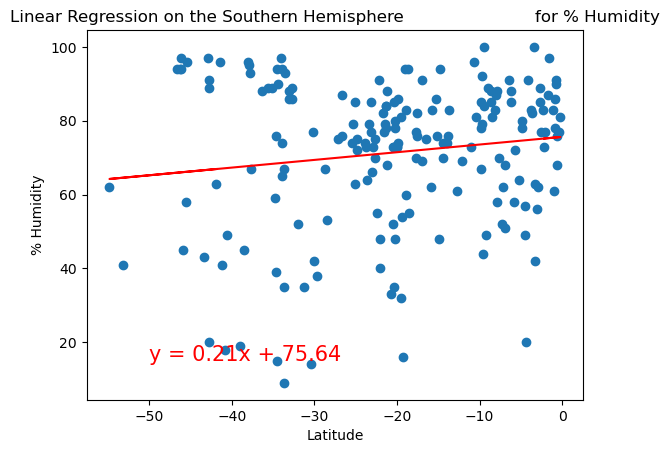

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

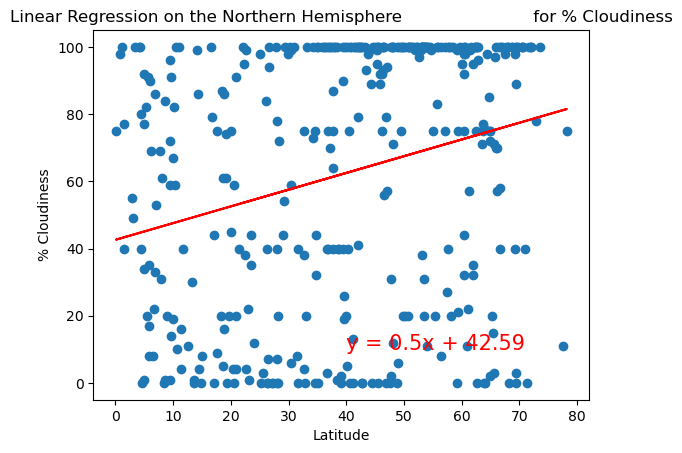

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

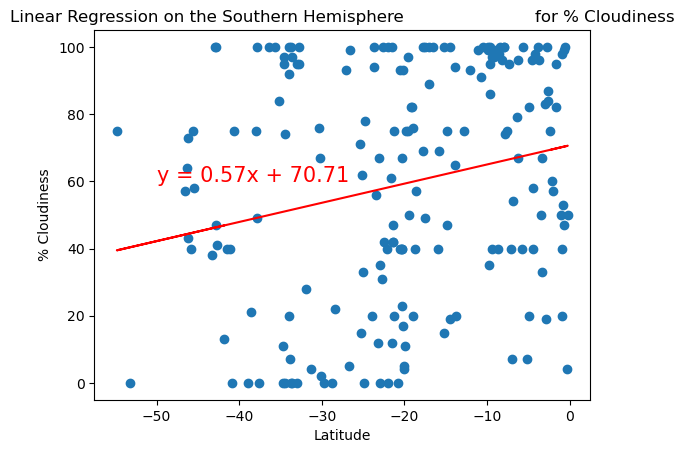

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

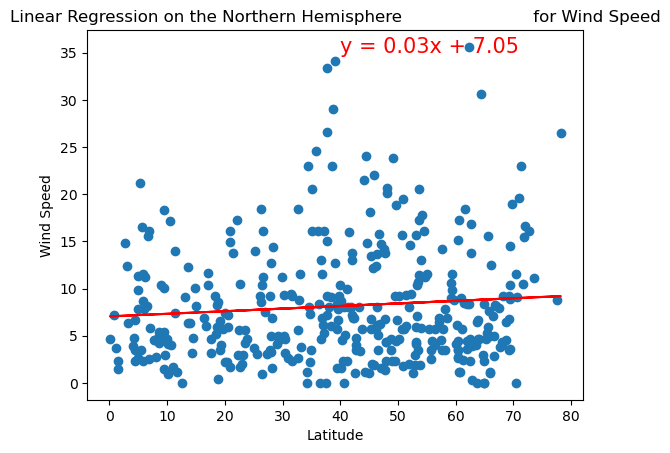

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

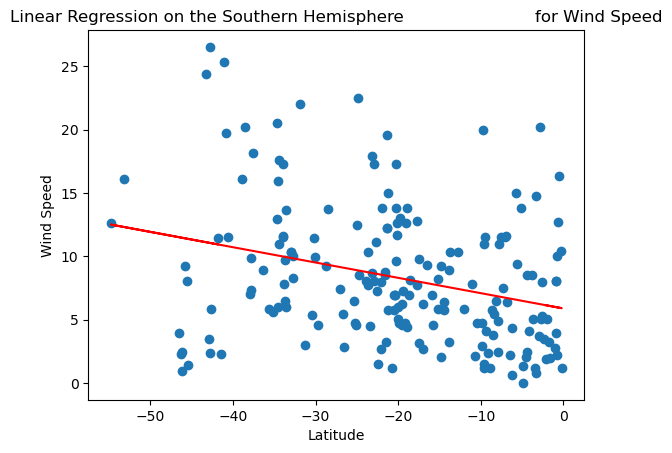

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))